# Generating Punks with a VAE & Labels

In [1]:
import sys
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load pallets library

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # uncomment to run nb from 'pallets/nb'
# sys.path.append(os.path.abspath(os.getcwd()))                    # uncomment to run from project root

from pallets import images as I, datasets as DS, models as M


In [3]:
# To GPU, or not to GPU

device = M.get_device(require_gpu=True)


## Prepare Datasets

In [4]:
all_colors = I.get_punk_colors()
mapper = DS.ColorOneHotMapper(all_colors)
dataset = DS.OneHotAndLabelsDataset(mapper, device=device, test_size=1000)


In [5]:
batch_size = 32
num_workers = 0

train_sampler = SubsetRandomSampler(dataset.train_idx)
test_sampler = SubsetRandomSampler(dataset.test_idx)

train_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
test_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler, num_workers=num_workers
)



## Training

In [8]:
# Cue training montage

num_labels = len(dataset._labels[0])

model = M.vae.LabeledVAE(222, (64, 32), 20, num_labels).to(device)
criterion = M.vae.Loss().to(device)


train_losses, test_losses = M.vae.train(
    device, model, criterion, train_loader, test_loader,
    learn_rate=1e-03, epochs=50
)


epoch 1 (0%)	 loss: 511126.843750
epoch 1 (35%)	 loss: 4603.400879
epoch 1 (71%)	 loss: 3174.203125
epoch 1 (100%)	 loss: 964.026833
epoch 1 test	 loss: 203.052442
epoch 2 (0%)	 loss: 3295.598145
epoch 2 (35%)	 loss: 3043.049561
epoch 2 (71%)	 loss: 2831.271729
epoch 2 (100%)	 loss: 183.690663
epoch 2 test	 loss: 163.799301
epoch 3 (0%)	 loss: 2529.678467
epoch 3 (35%)	 loss: 2487.468506
epoch 3 (71%)	 loss: 2310.230469
epoch 3 (100%)	 loss: 151.793595
epoch 3 test	 loss: 143.986797
epoch 4 (0%)	 loss: 2298.099609
epoch 4 (35%)	 loss: 2148.415527
epoch 4 (71%)	 loss: 2229.571045
epoch 4 (100%)	 loss: 136.061045
epoch 4 test	 loss: 131.701481
epoch 5 (0%)	 loss: 2129.429443
epoch 5 (35%)	 loss: 1975.338867
epoch 5 (71%)	 loss: 1926.582764
epoch 5 (100%)	 loss: 125.825246
epoch 5 test	 loss: 123.456267
epoch 6 (0%)	 loss: 1807.283691
epoch 6 (35%)	 loss: 1933.133667
epoch 6 (71%)	 loss: 1888.898560
epoch 6 (100%)	 loss: 118.128822
epoch 6 test	 loss: 112.553964
epoch 7 (0%)	 loss: 1700.6

In [9]:
M.save(model, 'laebels.pkl')
# model = M.load('laebels.pkl')


## Generate punk with specific features

torch.Size([1, 222, 24, 24])
torch.Size([222, 24, 24])
torch.Size([4, 24, 24])


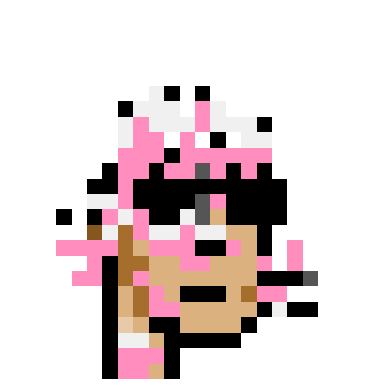

In [27]:

z = torch.randn(1, 20 + num_labels).to(device)

with torch.no_grad():
    model.eval()
    generated_image = model.decode(z)
    print(generated_image.shape)


decoded_one_hot = generated_image[0]
print(decoded_one_hot.shape)

decoded = DS.one_hot_to_rgba(decoded_one_hot, mapper)
print(decoded.shape)

plt.imshow(transforms.functional.to_pil_image(decoded))
plt.axis('off')
plt.show()


In [28]:
import json
ps_labels = json.load(open("../../cpunks-10k/cpunks/data/punks.json"))
label_keys = [k for k in ps_labels["0"].keys()]
_, test_labels = next(iter(train_loader))
features = test_labels[2]

enabled_features = [k for k,v in zip(label_keys, features) if v.item() == 1]

print(f"Features: {enabled_features}")


Features: ['male', 'peakSpike', 'cigarette']


torch.Size([1, 222, 24, 24])
torch.Size([222, 24, 24])
torch.Size([4, 24, 24])


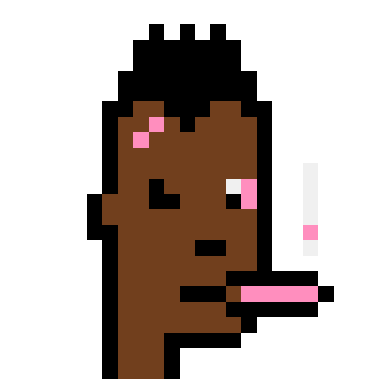

In [29]:
# Generate new image

z = torch.randn(1, 20).to(device)
z = torch.concat([z, features.unsqueeze(0)], dim=1)

with torch.no_grad():
    model.eval()
    generated_image = model.decode(z)
    print(generated_image.shape)


decoded_one_hot = generated_image[0]
print(decoded_one_hot.shape)

decoded = DS.one_hot_to_rgba(decoded_one_hot, mapper)
print(decoded.shape)

plt.imshow(transforms.functional.to_pil_image(decoded))
plt.axis('off')
plt.show()


In [13]:
train_losses


[30766.813815935282,
 5862.467960005956,
 4844.4764369667,
 4342.373785789977,
 4015.69934298468,
 3770.0687760156943,
 3002.7231999390515,
 2415.5903636310118,
 2256.9019100108044,
 2165.98583389174,
 2106.456776071102,
 2049.144760131836,
 2007.950803391477,
 1983.5196134959551,
 1966.0157339758907,
 1963.7876011192375,
 1953.4041218859084,
 1940.3379655121066,
 1942.1621810155557,
 1934.844954253934,
 1935.1002395305227,
 1931.6895961896748,
 1938.2697422758063,
 1928.881475570354,
 1923.4114733756858,
 1925.8750967472158,
 1918.9621886124849,
 1925.2123903315119,
 1918.5262589691379,
 1917.1401938580452,
 1924.8074532366813,
 1923.882746486799,
 1914.2944493936309,
 1910.0212227030004,
 1913.4173079686807,
 1893.5971032541695,
 1884.123725837004,
 1883.421979322501,
 1881.2587788899739,
 1879.2214026484928,
 1872.2363333194814,
 1864.263457602643,
 1861.4797939002938,
 1863.7955170759917,
 1863.3204940904118,
 1862.4489925736232,
 1860.7213907444732,
 1853.1122367263686,
 1859.3649

In [14]:
test_losses


[6345.388824462891,
 5118.728168487549,
 4499.587390899658,
 4115.671291351318,
 3858.0083446502686,
 3517.311378479004,
 2584.444835662842,
 2323.4026165008545,
 2212.5982913970947,
 2132.701671600342,
 2074.4121475219727,
 2036.144136428833,
 1990.3351421356201,
 1975.8332901000977,
 1966.7931928634644,
 1950.9379138946533,
 1976.1823558807373,
 1939.8541622161865,
 1945.3476486206055,
 1917.7443313598633,
 1931.8715496063232,
 1965.483528137207,
 1935.0281867980957,
 1932.2427616119385,
 1925.9905128479004,
 1924.0210800170898,
 1936.55491065979,
 1922.090106010437,
 1912.7255516052246,
 1941.5564470291138,
 1957.6365232467651,
 1913.7757740020752,
 1900.2779521942139,
 1899.6478691101074,
 1905.4668617248535,
 1886.2185230255127,
 1882.3674087524414,
 1874.2485036849976,
 1868.31121301651,
 1871.9824018478394,
 1864.2863292694092,
 1857.6535396575928,
 1858.405439376831,
 1861.8355407714844,
 1852.561861038208,
 1845.335765838623,
 1854.7232036590576,
 1848.7884159088135,
 1843.926

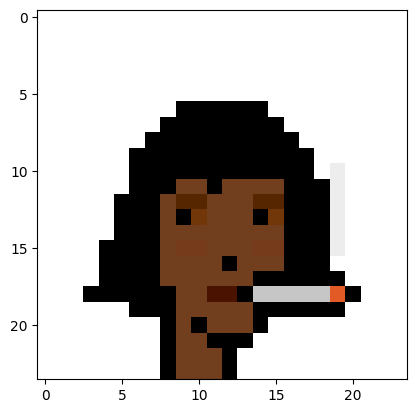

In [15]:
punk = I.get_punk_tensor(1000)

plt.imshow(transforms.functional.to_pil_image(punk))
plt.show()



In [23]:
ps_labels = json.load(open("../../cpunks-10k/cpunks/data/punks.json"))
punk_labels = torch.tensor([v for _,v in ps_labels["1000"].items()])
punk_labels = punk_labels.unsqueeze(0)


torch.Size([1, 222, 24, 24])


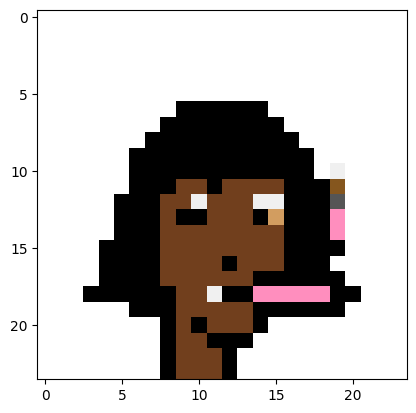

In [24]:
punk = I.get_punk_tensor(1000)

p = DS.rgba_to_one_hot(punk, mapper)
p = p.unsqueeze(0)

model.eval()
with torch.no_grad():
    reconstructed, mu, logcar = model.forward(p.to(device), punk_labels.to(device))
    print(reconstructed.shape)

recon_punk = reconstructed[0].cpu()
recon_punk = DS.one_hot_to_rgba(recon_punk, mapper)
plt.imshow(transforms.functional.to_pil_image(recon_punk.cpu()))
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

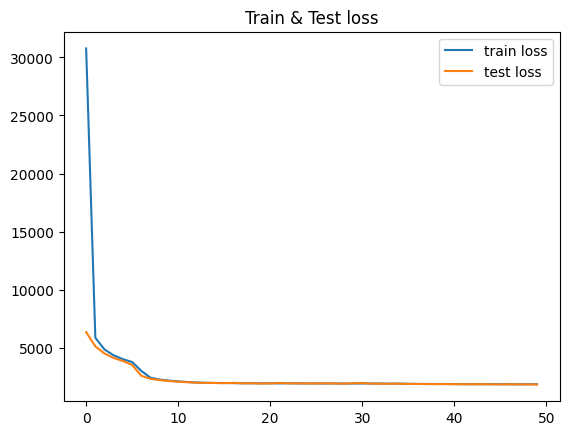

In [30]:
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show
